# Модуль №18. Django. Представления и Шаблоны. 

Где можно почитать про Django: https://metanit.com/python/django/ 

Курсы по Django на Stepik: 
- Добрый, добрый Django с Сергеем Балакиревым https://stepik.org/course/183363
- Django 5 для начинающих https://stepik.org/course/174634

Django — это высокоуровневый веб-фреймворк на Python, созданный для быстрого создания веб-приложений. Его ключевые принципы:
- **DRY (Don’t Repeat Yourself)** — сокращение дублирования кода.
- **MTV (Model-Template-View)** — Django работает по схеме MTV, которая похожа на классическую архитектуру MVC:
  - **Model** — управляет данными и логикой базы данных.
  - **Template** — отвечает за отображение данных.
  - **View** — обрабатывает запросы и возвращает данные, которые передаются в шаблон.

## Model, View, Controller (MVC)

**Model, View, Controller (MVC)** — это шаблон (паттерн) программирования, разделяющий архитектуру приложения на три модуля: модель (Model), представление (View), контроллер (Controller). Простыми словами, он позволяет изменять каждый компонент независимо друг от друга для простой разработки и поддержки веб-приложений.

#### Модель (Model)
Это основная логика приложения. Отвечает за данные, методы работы с ними и структуру программы. Модель реагирует на команды из контроллера и выдает информацию и/или изменяет свое состояние. Она передает данные в представление.

#### Представление (View)
Задача компонента — визуализация информации, которую он получает от модели. View отображает данные на уровне пользовательского интерфейса. Например, в виде таблицы или списка. Представление определяет внешний вид приложения и способы взаимодействия с ним.

#### Контроллер (Controller)
Он обеспечивает взаимодействие с системой: обрабатывает действия пользователя, проверяет полученную информацию и передает ее модели. Контроллер определяет, как приложение будет реагировать на действия пользователя. Также контроллер может отвечать за фильтрацию данных и авторизацию.

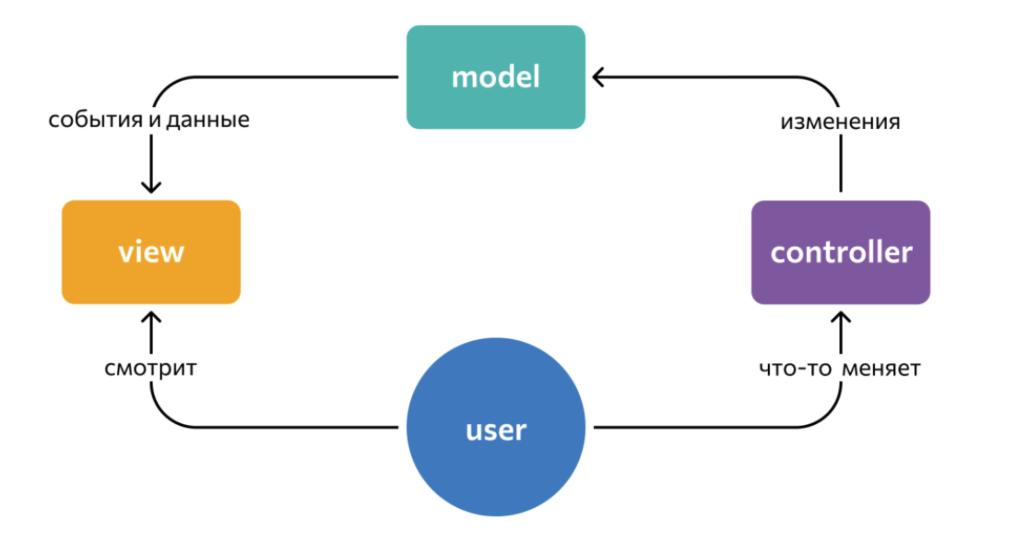

## Задание 1 

## Задание 2

### Создайте папку для шаблонов
   - В корневой папке проекта (рядом с `manage.py`) создайте папку `templates`.
   - Внутри `templates` создайте папку `second_task`.

```bash
mkdir templates
mkdir templates/second_task
```

Убедитесь, что приложение `task2` добавлено в список `INSTALLED_APPS` в файле `settings.py`:
 ```python
 INSTALLED_APPS = [
     ...
     'task2',
 ]

 TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [BASE_DIR / 'templates'],  # Убедитесь, что этот путь корректный
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
 ]

 ```

### Создайте HTML-шаблоны
В папке `second_task` создайте два HTML-файла:

`class_view_template.html` с содержимым:

```html
<!DOCTYPE html>
<html>
<head>
   <title>Class-Based View</title>
</head>
<body>
   <p>Это шаблон для классового представления</p>
</body>
</html>

```

    
`function_view_template.html` с содержимым:

```html
<!DOCTYPE html>
<html>
<head>
   <title>Function-Based View</title>
</head>
<body>
   <p>Это шаблон для функционального представления</p>
</body>
</html>
```

### Создайте представления в `task2`

Откройте файл `views.py` в приложении `task2` и добавьте два представления:

 ```python
 from django.shortcuts import render
 from django.views import View

 # Функциональное представление
 def function_based_view(request):
     return render(request, 'second_task/function_view_template.html')

 # Классовое представление
 class ClassBasedView(View):
     def get(self, request):
         return render(request, 'second_task/class_view_template.html')
 ```

### Создайте маршруты в приложении `task2`

В приложении `task2` создайте файл `urls.py` и добавьте маршруты для представлений:
     
 ```python
 from django.urls import path
 from . import views

 urlpatterns = [
     path('function-view/', views.function_based_view, name='function_view'),
     path('class-view/', views.ClassBasedView.as_view(), name='class_view'),
 ]
 ```

### Создайте маршруты внутри папки `UrbanDjango`

Подключите маршруты `task2` к основному файлу маршрутов проекта `urls.py` (внутри папки `UrbanDjango`):

 ```python
 from django.contrib import admin
 from django.urls import path, include # <--- add include

 urlpatterns = [
     path('admin/', admin.site.urls),
     path('task2/', include('task2.urls')),  # Подключаем маршруты приложения task2
 ]
 ```

### Запустите сервер и проверьте работоспособность

Запустите сервер:

 ```bash
 python manage.py runserver
 ```
     
Перейдите по следующим адресам в браузере для проверки:
 - [http://127.0.0.1:8000/task2/function-view/](http://127.0.0.1:8000/task2/function-view/) — должно отображаться сообщение: "Это шаблон для функционального представления".
 - [http://127.0.0.1:8000/task2/class-view/](http://127.0.0.1:8000/task2/class-view/) — должно отображаться сообщение: "Это шаблон для классового представления".

## Задание 3 

In [ ]:
(venv) (base) alselezneva@Aleksandras-MacBook-Pro UrbanDjango % python manage.py startapp task3
(venv) (base) alselezneva@Aleksandras-MacBook-Pro UrbanDjango % mkdir -p templates/third_task

Убедитесь, что приложение `task3` добавлено в `INSTALLED_APPS` в файле `settings.py`:
```python
INSTALLED_APPS = [
   ...
   'task3',
]
```

### Создайте шаблоны страниц
Теперь создадим три HTML-файла в папке `templates/third_task`.

#### 1. Главная страница (`index.html`)
Создайте файл `templates/third_task/index.html` и добавьте в него следующий код:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Главная страница</title>
</head>
<body>
    <h1>Главная страница</h1>
    <nav>
        <ul>
            <li><a href="/">Главная страница</a></li>
            <li><a href="/shop/">Магазин</a></li>
            <li><a href="/cart/">Корзина</a></li>
        </ul>
    </nav>
</body>
</html>
```

#### 2. Первая вторичная страница (Магазин) (`shop.html`)
Создайте файл `templates/third_task/shop.html` и добавьте в него следующий код:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Магазин</title>
</head>
<body>
    <h1>Магазин</h1>
    <ul>
        {% for item, description in items.items %}
            <li>{{ item }} - {{ description }}
                <button>Купить</button>
                <button>Подробнее</button>
            </li>
        {% endfor %}
    </ul>
    <a href="/"><button>Вернуться на главную</button></a>
</body>
</html>
```

#### 3. Вторая вторичная страница (Корзина) (`cart.html`)
Создайте файл `templates/third_task/cart.html` и добавьте в него следующий код:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Корзина</title>
</head>
<body>
    <h1>Корзина</h1>
    <p>Здесь отображаются товары, которые вы добавили в корзину.</p>
    <a href="/"><button>Вернуться на главную</button></a>
</body>
</html>
```

### Создайте представления в `task3/views.py`
Откройте файл `task3/views.py` и создайте представления для каждой страницы.

```python
from django.shortcuts import render

def index(request):
    return render(request, 'third_task/index.html')

def shop(request):
    # Словарь с элементами для магазина
    items = {
        'Игра 1': 'Описание игры 1',
        'Игра 2': 'Описание игры 2',
        'Игра 3': 'Описание игры 3',
    }
    return render(request, 'third_task/shop.html', {'items': items})

def cart(request):
    return render(request, 'third_task/cart.html')
```

### Настройте маршруты (URL-ы) в проекте
Поскольку все маршруты должны быть прописаны в `urls.py` проекта, откройте файл `UrbanDjango/urls.py` и добавьте следующие маршруты:

```python
from django.contrib import admin
from django.urls import path
from task3 import views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', views.index, name='index'),  # Главная страница
    path('shop/', views.shop, name='shop'),  # Магазин
    path('cart/', views.cart, name='cart'),  # Корзина
]
```

### Запустите сервер и проверьте работу сайта
Запустите сервер, чтобы проверить работоспособность страниц:

```bash
python manage.py runserver
```

### Проверка страниц
Перейдите по следующим адресам, чтобы проверить работу сайта:
- Главная страница: [http://127.0.0.1:8000/](http://127.0.0.1:8000/)
- Магазин: [http://127.0.0.1:8000/shop/](http://127.0.0.1:8000/shop/)
- Корзина: [http://127.0.0.1:8000/cart/](http://127.0.0.1:8000/cart/)
